Setup (importing stuff)

In [1]:
import backup
from make_model import make_cnn
from gen_data import generate_data
from train_model import train
from test_model import test

In [2]:
import torch
import numpy

In [3]:
#num_small = 10
#num_large = 100

#original_data = 'Dataset_OG'
#data_dir = 'Dataset'
#small_dir = 'S-Dataset'
#large_dir = 'L-Dataset'

#backup.full_copy(original_data, data_dir)


In [4]:
data_dir = 'Manually Sorted Pizza'

In [5]:
learning_rate = 0.001
batch_size = 16
image_size = 256
train_split = .8
seed = 69
epochs = 20

H = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
model, lossFn, opt = make_cnn(image_size, learning_rate)

In [7]:
train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader, train_steps, val_steps = generate_data(data_dir, batch_size, image_size, train_split, seed, True)

In [8]:
model = model.to(device)
train(model, lossFn, opt, H, train_loader, val_loader, epochs, device, train_steps, val_steps)

[INFO] EPOCH: 1/20
Train loss: 1.632046, Train accuracy: 0.1875
Val loss: 2.181643, Val accuracy: 0.1200

[INFO] EPOCH: 2/20
Train loss: 1.612355, Train accuracy: 0.1975
Val loss: 2.178815, Val accuracy: 0.1200

[INFO] EPOCH: 3/20
Train loss: 1.612016, Train accuracy: 0.1950
Val loss: 2.159173, Val accuracy: 0.1200

[INFO] EPOCH: 4/20
Train loss: 1.620305, Train accuracy: 0.1825
Val loss: 2.211451, Val accuracy: 0.1400

[INFO] EPOCH: 5/20
Train loss: 1.495829, Train accuracy: 0.3050
Val loss: 1.898955, Val accuracy: 0.3600

[INFO] EPOCH: 6/20
Train loss: 1.359233, Train accuracy: 0.4275
Val loss: 2.107660, Val accuracy: 0.4600

[INFO] EPOCH: 7/20
Train loss: 1.216418, Train accuracy: 0.4975
Val loss: 1.823117, Val accuracy: 0.5600

[INFO] EPOCH: 8/20
Train loss: 1.123544, Train accuracy: 0.5350
Val loss: 2.263510, Val accuracy: 0.4000

[INFO] EPOCH: 9/20
Train loss: 1.077670, Train accuracy: 0.5525
Val loss: 1.471901, Val accuracy: 0.5600

[INFO] EPOCH: 10/20
Train loss: 0.944729, Trai

In [9]:
# Print information about the datasets
print("Train Dataset:", train_dataset.dataset.classes)
print("Train Labels:", [label for _, label in train_dataset])

print("Validation Dataset:", val_dataset.dataset.classes)
print("Validation Labels:", [label for _, label in val_dataset])

print("Test Dataset:", test_dataset.dataset.classes)
print("Test Labels:", [label for _, label in test_dataset])

Train Dataset: ['Black Olive', 'Cheese', 'Hawaiian', 'Pepperoni', 'Taco']


C:\Users\supertaco512\anaconda3\envs\yetanothertftest\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Labels: [4, 3, 3, 1, 3, 3, 4, 4, 3, 3, 4, 4, 1, 4, 3, 3, 4, 4, 0, 2, 1, 3, 3, 0, 3, 2, 2, 0, 2, 4, 1, 1, 0, 0, 4, 0, 2, 4, 3, 3, 2, 0, 1, 3, 0, 1, 0, 1, 1, 3, 0, 2, 1, 4, 1, 2, 2, 4, 0, 2, 3, 0, 3, 2, 2, 0, 2, 3, 4, 3, 4, 1, 1, 1, 0, 1, 3, 1, 3, 3, 3, 0, 2, 1, 2, 3, 0, 4, 3, 0, 3, 4, 4, 0, 1, 4, 4, 0, 1, 2, 4, 2, 0, 2, 4, 3, 2, 3, 4, 4, 2, 1, 0, 2, 4, 0, 2, 0, 0, 4, 0, 0, 3, 2, 3, 4, 1, 4, 2, 0, 3, 0, 2, 3, 1, 0, 3, 1, 4, 3, 1, 0, 1, 0, 4, 0, 0, 4, 0, 0, 3, 1, 1, 4, 0, 4, 4, 0, 4, 2, 4, 0, 4, 2, 1, 1, 2, 4, 0, 0, 3, 4, 2, 4, 2, 3, 4, 3, 2, 2, 2, 4, 3, 2, 3, 0, 2, 4, 4, 1, 4, 0, 1, 1, 3, 2, 0, 2, 1, 1, 2, 3, 3, 1, 0, 3, 2, 0, 4, 1, 0, 4, 3, 3, 1, 3, 2, 3, 2, 4, 4, 3, 0, 1, 0, 0, 3, 4, 3, 1, 3, 0, 4, 3, 4, 1, 4, 2, 4, 2, 4, 1, 0, 4, 2, 1, 2, 4, 1, 2, 4, 0, 0, 1, 2, 0, 4, 0, 0, 1, 0, 4, 4, 1, 0, 3, 1, 0, 2, 2, 0, 2, 4, 2, 1, 4, 3, 2, 4, 1, 1, 2, 0, 3, 2, 3, 0, 0, 2, 4, 1, 2, 4, 2, 4, 2, 2, 1, 3, 3, 4, 2, 3, 2, 0, 3, 0, 0, 2, 1, 2, 1, 2, 0, 4, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 2, 3, 0, 1

              precision    recall  f1-score   support

 Black Olive       0.80      0.89      0.84         9
      Cheese       0.53      0.80      0.64        10
    Hawaiian       1.00      0.20      0.33        15
   Pepperoni       0.50      0.80      0.62         5
        Taco       0.64      0.82      0.72        11

    accuracy                           0.64        50
   macro avg       0.70      0.70      0.63        50
weighted avg       0.74      0.64      0.60        50

[INFO] loading the test dataset...


AttributeError: 'Subset' object has no attribute 'classes'

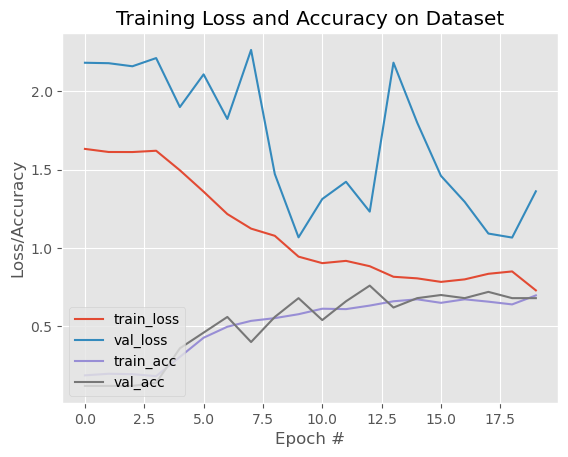

In [10]:
#ten_test_dataset = test_dataset.dataset.numpy()

test(model, test_loader, test_dataset, device, H)

In [ ]:
del model, train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader, train_steps, val_steps

In [ ]:
torch.cuda.empty_cache()

In [ ]:
data_dir = 'Manually Sorted Pizza'

In [ ]:
H = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
}

model, lossFn, opt = make_cnn(image_size, learning_rate)

train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader, train_steps, val_steps = generate_data(data_dir, batch_size, image_size, train_split, seed, False)

model = model.to(device)
train(model, lossFn, opt, H, train_loader, val_loader, epochs, device, train_steps, val_steps)

#test(model, test_loader, test_dataset, device, H)

del model, train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader, train_steps, val_steps

torch.cuda.empty_cache()